# Distribution Visualization

**-Normal Distribution**

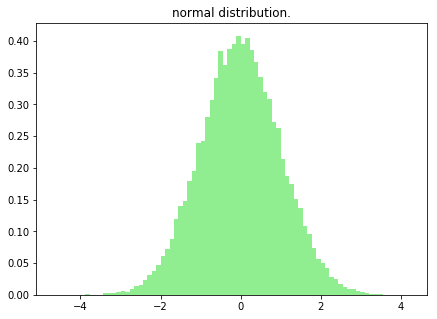

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from matplotlib import animation as ani

def plot_dist(data, bins, title =""):
    plt.figure(figsize=(7,5))
    plt.title(title)
    plt.hist(data, bins, color="lightgreen", normed=True)
    plt.show()

x = np.random.normal(0, 1, 30000)
plot_dist(x,80, "normal distribution.")

**-Chi squared distribution**

独立に標準正規分布に従う kk 個の確率変数 X1,...,XkX1,...,Xk をとる。 このとき、統計量
Z=∑i=1kX2i
Z=∑i=1kXi2
の従う分布のことを自由度 kk のカイ二乗分布と呼ぶ。

RuntimeError: The animation function must return a sequence of Artist objects.

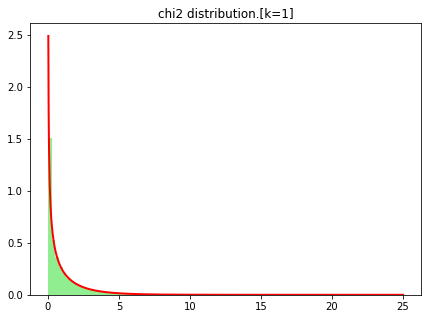

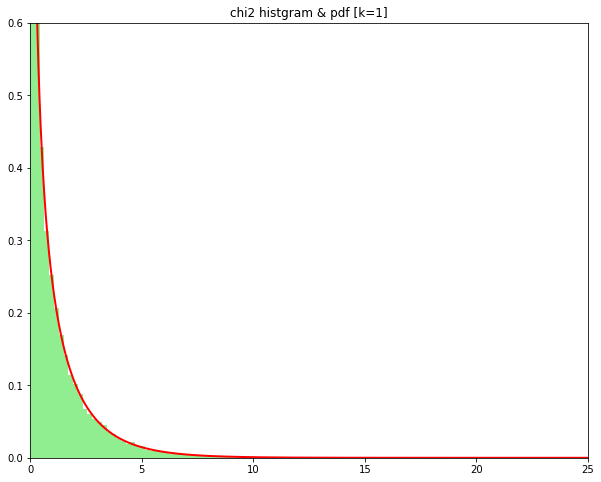

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from matplotlib import animation as ani

# 標準正規分布に従う乱数を30,000個生成
x = np.random.normal(0, 1, 30000)
# 生成した乱数を２乗する【【ここがキモ！！！】】
x2 = x**2

# ヒストグラムの描画
plt.figure(figsize=(7,5))
plt.title("chi2 distribution.[k=1]")
plt.hist(x2, 80, color="lightgreen", normed=True)

# 自由度1のカイ二乗分布の描画
xx = np.linspace(0, 25 ,1000)
plt.plot(xx, chi2.pdf(xx, df=1), linewidth=2, color="r")

def animate(nframe):
    n = 30000
    k = nframe + 1
    cum = np.zeros(n)
    for i in range(k):
        # 標準正規分布に従う乱数を30,000個生成
        x = np.random.normal(0, 1, n)
        # 生成した乱数を２乗する【ここがキモです！】
        x2 = x**2
        # 足し合わせた数が自由度となります。
        cum += x2

    # ヒストグラムの描画
    plt.clf()
    #plt.figure(figsize=(9,7))
    plt.ylim(0, 0.6)
    plt.xlim(0, 25)
    plt.title("chi2 histgram & pdf [k=%d]"%k)
    plt.hist(cum, 80, color="lightgreen", normed=True)

    # 自由度1のカイ二乗分布の描画
    xx = np.linspace(0, 25 ,1000)
    plt.plot(xx, chi2.pdf(xx, df=k), linewidth=2, color="r")


fig = plt.figure(figsize=(10,8))
anim = ani.FuncAnimation(fig, animate, frames=10, blit=True)
anim.save('filename.mp4', fps=13)

2乗しているので、全てプラスになるのでx=0よりすべて右にデータが移っていて、
2乗なので、
* x<1x<1となる1より小さいところは0側に寄り、左におしつけられる
* x≥1x≥1となる1より大きいところは∞側に寄り、右に引き伸ばされる
感じになります。